In [1]:
import matplotlib.pyplot as plt
from data.cifar import CIFAR20
from PIL import Image
import pandas as pd
import numpy as np

dataset = CIFAR20(train=True, transform=None, download=True)
dataset.data.shape, len(dataset.targets)

Files already downloaded and verified


((50000, 32, 32, 3), 50000)

In [2]:
pd.DataFrame(dataset.targets).describe()

,0
count,50000.000000
mean,9.500000
std,5.766339
min,0.000000
25%,4.750000
50%,9.500000
75%,14.250000
max,19.000000


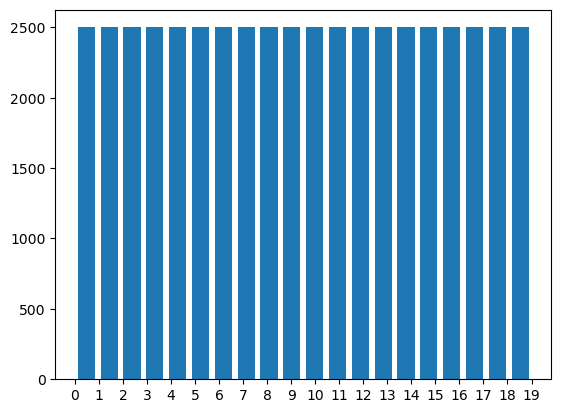

In [3]:
plt.hist(dataset.targets,len(set(dataset.targets)),rwidth=0.75)
plt.xticks([target for target in set(dataset.targets)],list(set(dataset.targets)))
plt.show()

In [4]:
img_sample = {"data":np.array([np.asarray(Image.open("./data/cifar_img_5109.jpeg"))]),
              "targets":[-1]}
img_sample["data"].shape, len(img_sample["targets"])

((1, 32, 32, 3), 1)

In [5]:
from sampleDataSet import SampleDataSet
from get_sample_img import get_pic
img_samples = np.array([np.asarray(get_pic(idx)[0]) for idx in range(128)])
#np.array([np.asarray(Image.open(args.path_to_img))])
#np.array([np.asarray(Image.open(args.path_to_img))])
img_dataset = SampleDataSet(img_samples,transform=None)

img_dataset.data.shape, len(img_dataset.targets)

Files already downloaded and verified


((128,), 128)

In [6]:
pd.DataFrame(img_dataset.targets).describe()

,0
count,128.0
mean,-1.0
std,0.0
min,-1.0
25%,-1.0
50%,-1.0
75%,-1.0
max,-1.0


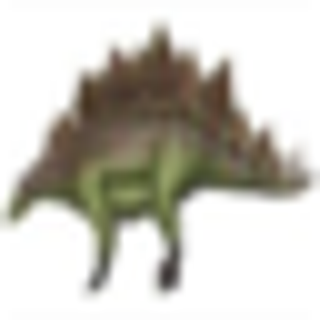

In [7]:
#Image.fromarray(img_dataset.data[1]).resize((320,320))
Image.fromarray(dataset.data[1]).resize((320,320))

In [8]:
data = np.load("./results/cifar-20/pretext/topk-single_img-neighbors.npy")
#data = np.load("./results/cifar-20/pretext/topk-val-neighbors.npy")
#data = np.load("./results/cifar-20/pretext/topk-train-neighbors.npy")
data.shape

(1, 61)

In [9]:
df = pd.DataFrame(data, index = pd.Series([*range(data.shape[0])],name="DataSample"), columns=pd.Series([*range(data.shape[1])],name="KNN"))
df = df.drop(columns = df.columns[0])
df

KNN,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
DataSample,,,,,,,,,,,,,,,,,,,,,
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [10]:
df.describe()

KNN,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
75%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
max,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [11]:
from utils.common_config import get_model
import yaml

with open("configs/scan/scan_cifar20.yml", 'r') as stream:
    config_scan = yaml.safe_load(stream)
config_scan['batch_size'] = 1
scan = get_model(config_scan)


In [16]:
from utils.common_config import get_train_dataset, get_train_transformations, get_train_dataloader

transforms = get_train_transformations(config_scan)
dataset = get_train_dataset(config_scan, transforms)
dataloader = get_train_dataloader(config_scan, dataset)
next(iter(dataloader))

Files already downloaded and verified


{'image': tensor([[[[ 1.2122,  1.1243,  1.1243,  ..., -1.8957, -1.8957, -1.8957],
           [ 0.9044,  0.7871,  0.7431,  ..., -1.8957, -1.8957, -1.8957],
           [ 0.6698,  0.6112,  0.5672,  ..., -1.8957, -1.8957, -1.8957],
           ...,
           [-1.8957, -1.7491,  0.8164,  ...,  1.4908,  1.5054,  1.5201],
           [-1.8957, -1.7344,  1.2416,  ...,  1.3149,  1.6227,  1.7400],
           [-1.8957, -1.8957,  1.7693,  ...,  1.4468,  1.6814,  1.6814]],
 
          [[ 1.4049,  1.3285,  1.3438,  ..., -1.8975, -1.8975, -1.8975],
           [ 1.1450,  1.0380,  1.0074,  ..., -1.8975, -1.8975, -1.8975],
           [ 0.9615,  0.9004,  0.8851,  ..., -1.8975, -1.8975, -1.8975],
           ...,
           [-1.8975, -1.7293,  1.0533,  ...,  1.7107,  1.7413,  1.7565],
           [-1.8975, -1.7293,  1.5119,  ...,  1.5731,  1.8330,  1.9400],
           [-1.8975, -1.8975,  2.0012,  ...,  1.7107,  1.9094,  1.9094]],
 
          [[ 1.6561,  1.6419,  1.6419,  ..., -1.5965, -1.5965, -1.5965],
    

In [18]:
res = scan(next(iter(dataloader))["image"], forward_pass='return_all') 
res["features"]

tensor([[0.7301, 0.8154, 0.8592, 0.8780, 0.8797, 0.7533, 0.6901, 0.9420, 0.8501,
         0.9357, 0.8860, 1.0282, 0.9081, 0.8675, 0.8325, 0.8847, 0.5796, 0.7538,
         0.9005, 0.8428, 0.8841, 0.9381, 0.8009, 0.5584, 0.8467, 0.7188, 0.8596,
         0.8450, 0.7848, 0.8796, 0.8859, 0.8243, 0.8276, 0.8754, 0.7192, 0.8053,
         0.8700, 1.0979, 0.6153, 0.6686, 0.8193, 0.6122, 0.7443, 0.7626, 1.0577,
         0.7042, 0.9121, 0.7948, 0.9688, 0.6449, 0.8775, 0.9266, 0.7974, 0.7564,
         0.8210, 0.8716, 0.8141, 0.9230, 0.8296, 0.7515, 0.8639, 0.9010, 0.8805,
         0.7909, 0.6549, 0.9260, 0.9125, 0.5602, 0.9293, 0.8409, 0.8414, 0.8642,
         0.9934, 0.7833, 0.8175, 0.8374, 0.8621, 0.8789, 0.7539, 0.8573, 0.8637,
         0.8020, 0.8656, 0.6773, 0.8043, 0.9630, 0.8545, 0.8608, 0.7127, 0.7744,
         0.8495, 0.9104, 0.7303, 0.8944, 0.7042, 0.8785, 1.0001, 0.8499, 0.8130,
         0.8734, 0.8816, 0.6440, 1.0273, 0.8414, 0.8556, 0.7791, 0.8780, 0.7627,
         0.7198, 0.7090, 0.8

In [20]:
res["output"]

[tensor([[-5.4409e-04, -1.9499e-01, -5.7069e-01, -1.1449e+00,  1.9544e-01]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.1987,  0.0230,  0.2062, -0.3931,  0.0327, -0.3213, -0.0438,  0.2626,
          -0.2973, -0.8491, -0.3604, -0.1928,  0.4503, -0.1627, -0.1851,  0.3133,
          -0.1616,  0.6430, -0.1978, -0.3774]], grad_fn=<AddmmBackward0>),
 tensor([[ 5.3032e-01,  1.9410e-01,  1.9194e-01,  6.4802e-01, -1.7250e-01,
          -6.7472e-01, -2.9193e-01, -4.9618e-01, -3.6988e-01, -9.5771e-01,
          -4.5254e-01, -4.9906e-01, -1.2822e-01, -7.3416e-01,  4.1981e-01,
           4.6111e-01, -6.4207e-01,  1.0256e-02,  1.1888e+00, -1.2590e-01,
          -3.3174e-01,  3.3308e-01, -5.0307e-02, -6.8124e-01,  5.0194e-01,
          -2.3797e-01,  1.2041e-01, -2.2634e-01,  5.1567e-01, -8.8217e-01,
          -6.5065e-01,  6.1377e-02, -9.7423e-04, -1.7813e-01,  2.4924e-01,
          -8.0275e-01, -8.0199e-01,  1.6015e-01, -1.1162e+00,  2.7330e-01,
           3.4229e-01, -2.0597e-01, -2.1749e-01, 